In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


# Import data

In [42]:
weekly_close_price = pd.read_csv('./weekly_mean_closing_price_by_ticker_all.csv')
weekly_tweet_count = pd.read_csv('./weekly_tweet_count_all.csv')

## Select time period: 2016-01 to 2021-13 (Year-Week) 

In [43]:
weekly_close_price.set_index('Year-Week',inplace=True)
weekly_close_price = weekly_close_price['2016-01':'2021-13']

# Drop 'DNNGY' 'SCTY' to test from 2016 (have NaN values)
weekly_close_price.drop(columns=['DNNGY','SCTY'], inplace=True)

In [44]:
weekly_close_price

,COENF,DQ,ENPH,FSLR,GCTAY,ORA,RUN,SPWR,TSLA,VWDRY
Year-Week,,,,,,,,,,
2016-01,3.168300,15.7360,3.1980,68.0220,3.430000,35.3500,9.996,28.3460,218.5060,22.42900
2016-02,3.168300,13.4740,2.5100,63.0220,3.366000,34.7260,8.396,23.7940,205.8600,21.26200
2016-03,3.161225,12.8125,2.2625,63.1075,3.270000,33.8500,8.425,22.8100,201.4850,20.84800
2016-04,3.140000,14.1480,2.3300,66.3440,3.364000,34.1840,9.010,24.2260,191.7820,21.19640
2016-05,3.140000,15.9980,2.2700,66.8040,3.662000,34.8160,8.278,25.0160,178.2260,21.17994
...,...,...,...,...,...,...,...,...,...,...
2021-09,5.700000,97.5980,162.5380,79.2040,6.968000,81.4600,58.800,33.6480,655.4920,59.51500
2021-10,5.700000,84.7660,152.6480,77.3620,6.888700,84.7600,56.516,33.1720,659.5940,61.04620
2021-11,5.350000,84.4460,161.5440,80.5420,6.744000,79.7740,56.590,33.3540,678.9320,60.47700


In [48]:
weekly_tweet_count.set_index('Year-Week', inplace=True)
weekly_tweet_count = weekly_tweet_count['2016-01':'2021-13']

In [49]:
weekly_tweet_count

,Enphase Energy,First Solar,Siemens,Plug Power,Sunrun,Sunpower,Meridian
Year-Week,,,,,,,
2016-01,327,843.0,114,114,660.0,244,9.0
2016-02,205,463.0,137,137,637.0,122,7.0
2016-03,252,538.0,116,116,873.0,195,4.0
2016-04,206,340.0,173,173,497.0,115,3.0
2016-05,218,258.0,113,113,595.0,139,3.0
...,...,...,...,...,...,...,...
2021-09,1002,236.0,723,723,424.0,267,40.0
2021-10,1189,372.0,447,447,545.0,237,39.0
2021-11,634,177.0,377,377,353.0,208,18.0


# Merge stock closing prices and Twitter Popularity 

## Merge datasets of Enphase Energy

In [55]:
enphase = pd.DataFrame(weekly_tweet_count['Enphase Energy'])

In [59]:
enphase = pd.merge(enphase, weekly_close_price['ENPH'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])

In [68]:
enphase.rename(columns={"Enphase Energy":"Weekly Tweets","ENPH":"close"}, inplace=True)

In [103]:
enphase.dropna(inplace=True)

<AxesSubplot:xlabel='Year-Week'>

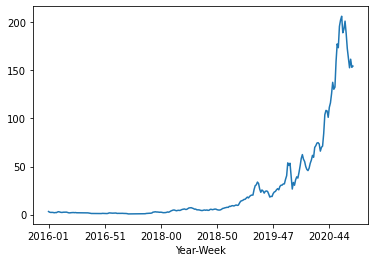

In [104]:
enphase['close'].plot()

## Lag Analysis Enphase

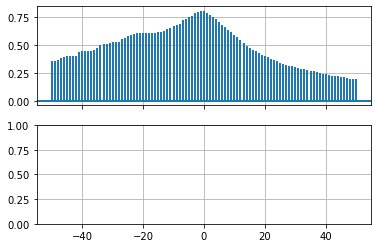

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(enphase['Weekly Tweets'].to_numpy().flatten(), enphase['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

# ax2.acorr(enphase['Weekly Tweets'].to_numpy().flatten(), usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()